(sec:pandas10min_2)=
# 판다스 10분 완성 2부


**필수 라이브러리**

In [1]:
import numpy as np
import pandas as pd

## 합병과 결합: merge-join-concat

- 참고: [Merging section](https://pandas.pydata.org/docs/user_guide/merging.html#merging)

### 종/횡 결합: `pd.concat()` 함수

`pd.concat()` 함수는 여러 개의 데이터프레임을 하나로 합친다.

- `axis=0`: 종 결합. 즉 데이터프레임 여러 개의 위아래 결합.

In [2]:
df1 = pd.DataFrame(
    {
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
        "C": ["C0", "C1", "C2", "C3"],
        "D": ["D0", "D1", "D2", "D3"],
    },
    index=[0, 1, 2, 3],
)

df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [3]:
df2 = pd.DataFrame(
    {
        "A": ["A4", "A5", "A6", "A7"],
        "B": ["B4", "B5", "B6", "B7"],
        "C": ["C4", "C5", "C6", "C7"],
        "D": ["D4", "D5", "D6", "D7"],
    },
    index=[4, 5, 6, 7],
)

df2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [4]:
df3 = pd.DataFrame(
    {
        "A": ["A8", "A9", "A10", "A11"],
        "B": ["B8", "B9", "B10", "B11"],
        "C": ["C8", "C9", "C10", "C11"],
        "D": ["D8", "D9", "D10", "D11"],
    },
    index=[8, 9, 10, 11],
)

df3

,A,B,C,D
8,A8,B8,C8,D8
9,A9,B9,C9,D9
10,A10,B10,C10,D10
11,A11,B11,C11,D11


In [5]:
pd.concat([df1, df2, df3]) # axis=0 이 기본값

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


- `axis=1`: 횡 결합. 즉 데이터프레임 여러 개의 좌우 결합.

In [6]:
df4 = pd.DataFrame(
    {
        "B": ["B2", "B3", "B6", "B7"],
        "D": ["D2", "D3", "D6", "D7"],
        "F": ["F2", "F3", "F6", "F7"],
    },
    index=[2, 3, 6, 7],
)

df4

,B,D,F
2,B2,D2,F2
3,B3,D3,F3
6,B6,D6,F6
7,B7,D7,F7


In [7]:
pd.concat([df1, df4], axis=1)

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


인덱스를 기존의 데이터프레임과 통일시키기 위해 리인덱싱을 활용할 수도 있다.

In [8]:
df1.index

Int64Index([0, 1, 2, 3], dtype='int64')

In [9]:
pd.concat([df1, df4], axis=1).reindex(df1.index)

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


In [10]:
pd.concat([df1, df4.reindex(df1.index)], axis=1)

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


### 합병: `pd.merge()` 함수

`pd.merge()` 함수 는 SQL 방식으로 특정 열을 기준으로 두 개의 데이터프레임을 합친다.
다양한 옵션을 지원하는 매우 강력한 도구이다.

- 참고: [Database style joining](https://pandas.pydata.org/docs/user_guide/merging.html#merging-join)

**예제**

실습을 위해 아래 두 데이터프레임을 이용한다.

In [11]:
left = pd.DataFrame({"key": ["foo", "foo"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "foo"], "rval": [4, 5]})

In [12]:
left

,key,lval
0,foo,1
1,foo,2


In [13]:
right

,key,rval
0,foo,4
1,foo,5


- `on="key"` 키워드 인자
    - `key` 열에 사용된 항목 각각에 대해 다른 열에서 해당 항목과 연관된 값들을 조합할 수 있는 모든 경우의 수를 다룬다.
    - `foo` 값에 대해 `lval` 열에서 2개의 값이,
        `rval` 열에서 2개의 값이 있기에 `foo`와 관련해서 총 4개의 경우가 생성된다.
    <br><br>
    
    | `key` | `left.lval` | `right.rval` | 경우의 수 |
    | :---: | :---: | :---: | :---: |
    | `foo` | `1, 2` | `4, 5` | 4 |

In [14]:
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


**예제**

In [15]:
left = pd.DataFrame({"key": ["foo", "bar"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "bar"], "rval": [4, 5]})

In [16]:
left

,key,lval
0,foo,1
1,bar,2


In [17]:
right

,key,rval
0,foo,4
1,bar,5


- `on="key"` 키워드 인자
    - `key` 열에 사용된 항목별로 모든 경우의 수를 다룬다.
    - `foo` 값에 대해 `lval` 열에서 1개의 값이,
        `rval` 열에서 1개의 값이 있기에 `foo`와 관련해서 총 1개의 경우가 생성된다.
    - `bar` 값에 대해 `lval` 열에서 1개의 값이,
        `rval` 열에서 1개의 값이 있기에 `foo`와 관련해서 총 1개의 경우가 생성된다.
    <br><br>
    
    | `key` | `left.lval` | `right.rval` | 경우의 수 |
    | :---: | :---: | :---: | :---: |
    | `foo` | `1` | `4` | 1 |        
    | `bar` | `2` | `5` | 1 |        

In [18]:
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,bar,2,5


**예제**

경우의 수는 지정된 열의 항목이 사용된 횟수를 기준으로 한다. 

In [19]:
left = pd.DataFrame(
    {
        "key": ["K0", "K1", "K2", "K3"],
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
    }
)

In [20]:
left

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [21]:
right = pd.DataFrame(
    {
        "key": ["K0", "K1", "K2", "K3"],
        "C": ["C0", "C1", "C2", "C3"],
        "D": ["D0", "D1", "D2", "D3"],
    }
)

In [22]:
right

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


| `key` | (`left.A`, `left.B`) | (`right.C`, `right.D`) | 경우의 수 |
| :---: | :---: | :---: | :---: |
| `K0` | (`A0`, `B0`) | (`C0`, `D0`) | 1 |
| `K1` | (`A1`, `B1`) | (`C1`, `D1`) | 1 |
| `K2` | (`A2`, `B2`) | (`C2`, `D2`) | 1 |
| `K3` | (`A3`, `B3`) | (`C3`, `D3`) | 1 |

In [23]:
result = pd.merge(left, right, on="key")
result

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


**다양한 키 활용**

- 두 개 이상의 키를 하나의 쌍으로 된 키를 사용하는 경우와 유사함. 

In [24]:
left = pd.DataFrame(
    {
        "key1": ["K0", "K0", "K1", "K2"],
        "key2": ["K0", "K1", "K0", "K1"],
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
    }
)

left

,key1,key2,A,B
0,K0,K0,A0,B0
1,K0,K1,A1,B1
2,K1,K0,A2,B2
3,K2,K1,A3,B3


In [25]:
right = pd.DataFrame(
    {
        "key1": ["K0", "K1", "K1", "K2"],
        "key2": ["K0", "K0", "K0", "K0"],
        "C": ["C0", "C1", "C2", "C3"],
        "D": ["D0", "D1", "D2", "D3"],
    }
)

right

,key1,key2,C,D
0,K0,K0,C0,D0
1,K1,K0,C1,D1
2,K1,K0,C2,D2
3,K2,K0,C3,D3


- `how='inner'`: 지정된 키의 교집합 대상

In [26]:
result = pd.merge(left, right, on=["key1", "key2"]) # how='inner' 가 기본값
result

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


In [27]:
result = pd.merge(left, right, how="inner", on=["key1", "key2"])
result

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


- `how='outer'`: 지정된 키의 합집합 대상

In [28]:
result = pd.merge(left, right, how="outer", on=["key1", "key2"])
result

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN
5,K2,K0,NaN,NaN,C3,D3


- `how='left'`: 왼쪽 데이터프레임의 키에 포함된 항목만 대상

In [29]:
left

,key1,key2,A,B
0,K0,K0,A0,B0
1,K0,K1,A1,B1
2,K1,K0,A2,B2
3,K2,K1,A3,B3


In [30]:
result = pd.merge(left, right, how="left", on=["key1", "key2"])
result

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN


- `how='right'`: 오른쪽 데이터프레임의 키에 포함된 항목만 대상

In [31]:
right

,key1,key2,C,D
0,K0,K0,C0,D0
1,K1,K0,C1,D1
2,K1,K0,C2,D2
3,K2,K0,C3,D3


In [32]:
result = pd.merge(left, right, how="right", on=["key1", "key2"])
result

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2
3,K2,K0,NaN,NaN,C3,D3


- `how='cross'`: 모든 경우의 수 조합

In [33]:
result = pd.merge(left, right, how="cross")
result

,key1_x,key2_x,A,B,key1_y,key2_y,C,D
0,K0,K0,A0,B0,K0,K0,C0,D0
1,K0,K0,A0,B0,K1,K0,C1,D1
2,K0,K0,A0,B0,K1,K0,C2,D2
3,K0,K0,A0,B0,K2,K0,C3,D3
4,K0,K1,A1,B1,K0,K0,C0,D0
5,K0,K1,A1,B1,K1,K0,C1,D1
6,K0,K1,A1,B1,K1,K0,C2,D2
7,K0,K1,A1,B1,K2,K0,C3,D3
8,K1,K0,A2,B2,K0,K0,C0,D0
9,K1,K0,A2,B2,K1,K0,C1,D1


### 합병: `DataFrame.join()` 메서드

인덱스를 기준으로 두 개의 데이터프레임을 합병할 때 사용한다.

In [34]:
left = pd.DataFrame(
    {"A": ["A0", "A1", "A2"], "B": ["B0", "B1", "B2"]}, index=["K0", "K1", "K2"]
)

left

,A,B
K0,A0,B0
K1,A1,B1
K2,A2,B2


In [35]:
right = pd.DataFrame(
    {"C": ["C0", "C2", "C3"], "D": ["D0", "D2", "D3"]}, index=["K0", "K2", "K3"]
)

right

,C,D
K0,C0,D0
K2,C2,D2
K3,C3,D3


In [36]:
left.join(right)

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2


아래와 같이 `pd.merge()` 함수를 이용한 결과와 동일하다.

In [37]:
pd.merge(left, right, left_index=True, right_index=True, how='left')

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2


`pd.merge()` 함수의 키워드 인자를 동일하게 사용할 수 있다.

- `how='outer'`

In [38]:
left.join(right, how="outer")

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2
K3,NaN,NaN,C3,D3


아래 코드가 동일한 결과를 낸다.

In [39]:
pd.merge(left, right, left_index=True, right_index=True, how='outer')

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2
K3,NaN,NaN,C3,D3


- `how='inner'`

In [40]:
left.join(right, how="inner")

,A,B,C,D
K0,A0,B0,C0,D0
K2,A2,B2,C2,D2


아래 코드가 동일한 결과를 낸다.

In [41]:
pd.merge(left, right, left_index=True, right_index=True, how='inner')

,A,B,C,D
K0,A0,B0,C0,D0
K2,A2,B2,C2,D2


## 다중 인덱스<font size='2'>MultiIndex</font>

- 참고: [Multiindex / advanced indexing](https://pandas.pydata.org/docs/user_guide/advanced.html)

다중 인덱스를 이용하여 데이터를 보다 체계적으로 다를 수 있다.
또한 이어서 다룰 그룹 분류<font size='2'>Group by</font>, 
모양 변환<font size='2'>reshaping</font>, 
피벗 변환<font size='2'>pivoting</font> 등에서 유용하게 활용된다.

### `MultiIndex` 객체

다중 인덱스 객체는 보통 튜플을 이용한다.
예를 들어 아래 두 개의 리스트를 이용하여 튜플을 생성한 다음 다중 인덱스로 만들어보자.

In [42]:
arrays = [
    ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
    ["one", "two", "one", "two", "one", "two", "one", "two"],
]

- 튜플 생성: 항목 8개

In [43]:
tuples = list(zip(*arrays))
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

**다중 인덱스 객체 생성: `from_tupes()` 함수**

튜플 리스트를 이용하여 다중 인덱스 객체를 생성할 수 있다.

In [44]:
index = pd.MultiIndex.from_tuples(tuples)
index

MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           )

- `names` 키워드 인자
    - 다중 인덱스의 각 레벨<font size='2'>level</font>의 이름 지정. 
    - 지정되지 않으면 `None`으로 처리됨.

예를 들어 위 코드에서 사용된 각각의 레벨에 이름은 다음과 같다.

- `"first"`: 0-레벨 이름
- `"second"`: 1-레벨 이름

In [45]:
index = pd.MultiIndex.from_tuples(tuples, names=["first", "second"])
index

MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second'])

**다중 인덱스 객체 생성: `from_arrays()` 함수**

길이가 동일한 여러 개의 리스트로 구성된 어레이를 직접 이용할 수도 있다.

In [46]:
index = pd.MultiIndex.from_arrays(arrays, names=["first", "second"])
index

MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second'])

### 다중 인덱스 라벨<font size='2'>label</font>을 사용하는 시리즈/데이터프레임 객체

- 시리즈 생성

아래 코드는 길이가 8인 어레이를 이용하여 시리즈를 생성한다.
인덱스의 라벨은 다중 인덱스가 사용된다.
각각의 레벨에서 라벨이 연속적으로 사용되는 경우는 보다 자연스러운 표현을 위해 생략되기도 한다.

In [47]:
s = pd.Series(np.random.randn(8), index=index)
s

first  second
bar    one      -0.607799
       two      -0.913102
baz    one      -1.778502
       two      -1.059300
foo    one      -0.792709
       two      -0.211867
qux    one       1.556909
       two       0.996539
dtype: float64

- 데이터프레임 생성

아래 코드는 8개의 행으로 이뤄진 2차원 어레이를 이용하여 데이터프레임을 생성한다.
`index` 또는 `columns`로 여러 개의 리스트로 구성된 어레이를 지정하면
자동으로 다중 인덱스 라벨이 지정된다.

In [48]:
df = pd.DataFrame(np.random.randn(8, 4), index=arrays)
df

0         1         2         3
bar one  2.030656  0.376489  1.141335 -0.496937
    two -1.049065 -0.562992 -0.162330  1.211488
baz one  1.296606 -0.520121  1.807022  0.072984
    two -0.018344  0.843905  1.797544  1.065783
foo one -2.134082  0.622530 -0.023470  0.512814
    two  0.620746  0.369565 -1.450611  0.028101
qux one  0.253583  1.000190 -0.672284  0.918641
    two -0.298728  0.093683  1.128488  0.838405

다중 인덱스를 열 라벨로도 활용할 수 있다.
아래 코드는 8개의 열로 이뤄진 2차원 어레이를 이용하여 데이터프레임을 생성한다.

In [49]:
df1 = pd.DataFrame(np.random.randn(3, 8), index=["A", "B", "C"], columns=index)
df1

first        bar                 baz                 foo                 qux  \
second       one       two       one       two       one       two       one   
A       0.330599  0.315753  0.087121 -0.261641 -0.202948 -1.069313 -2.323677   
B       1.477531 -0.345594  1.642444 -1.211870  0.117219 -0.966543 -1.864096   
C       1.241744 -0.216586  0.274948  0.035950  0.224802 -0.778546 -0.841613   

first             
second       two  
A      -0.457926  
B       0.059048  
C       1.760618

인덱스 라벨과 열 라벨 모두 다중 인덱스를 이용할 수도 있다.

- 동일한 길이의 리스트로 이루어진 리스트를 인덱스 또는 열의 라벨로 지정하면
    다중 인덱스로 자동 지정된다.

In [50]:
arrays2 = [
    ["toto", "toto", "titi", "titi", "tata", "tata"],
    ["A", "B", "A", "B", "A", "B"],
]

In [51]:
pd.DataFrame(np.random.randn(6, 6), index=index[:6], columns=arrays2)

toto                titi                tata          
                     A         B         A         B         A         B
first second                                                            
bar   one    -0.347631  1.072254  0.471837 -1.642741 -0.979077 -0.724657
      two     1.395496  1.696553  2.650434  0.373797  0.107726  0.325122
baz   one    -0.055872  0.383649 -1.183033 -0.653222  0.035347 -1.615866
      two    -0.980193 -0.070951  1.547395  1.567165  1.023213 -1.675204
foo   one     0.502871  0.262157 -0.986751  1.762325 -1.073118  0.007416
      two    -0.338555  2.261290 -0.528554  3.305570  0.892747 -0.074668

**주의사항**

튜플을 라벨로 사용하는 것은 다중 인덱스와 아무 상관 없다.
단지 라벨이 튜플인 것 뿐이다.

In [52]:
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [53]:
pd.Series(np.random.randn(8), index=tuples)

(bar, one)   -0.624963
(bar, two)    1.521088
(baz, one)    1.110684
(baz, two)   -1.539054
(foo, one)   -0.572905
(foo, two)    0.785000
(qux, one)    1.454337
(qux, two)    0.995195
dtype: float64

### 인덱스의 레벨

다중 인덱스 객체의 `get_level_values()` 메서드를 이용하여 레벨별 인덱스 라벨을 확인할 수 있다.

- 0-레블 라벨

In [54]:
index.get_level_values(0)

Index(['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'], dtype='object', name='first')

레벨 이름을 이용할 수도 있다.

In [55]:
index.get_level_values("first")

Index(['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'], dtype='object', name='first')

- 1-레블 라벨

In [56]:
index.get_level_values(1)

Index(['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two'], dtype='object', name='second')

In [57]:
index.get_level_values("second")

Index(['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two'], dtype='object', name='second')

### 인덱싱

다중 인덱스를 라벨로 사용하는 시리즈와 데이터프레임의 인덱싱은 일반 인덱싱과 크게 다르지 않다.

- 시리즈 인덱싱

In [58]:
s

first  second
bar    one      -0.607799
       two      -0.913102
baz    one      -1.778502
       two      -1.059300
foo    one      -0.792709
       two      -0.211867
qux    one       1.556909
       two       0.996539
dtype: float64

In [59]:
s["qux"]

second
one    1.556909
two    0.996539
dtype: float64

- 데이터프레임 인덱싱

In [60]:
df

0         1         2         3
bar one  2.030656  0.376489  1.141335 -0.496937
    two -1.049065 -0.562992 -0.162330  1.211488
baz one  1.296606 -0.520121  1.807022  0.072984
    two -0.018344  0.843905  1.797544  1.065783
foo one -2.134082  0.622530 -0.023470  0.512814
    two  0.620746  0.369565 -1.450611  0.028101
qux one  0.253583  1.000190 -0.672284  0.918641
    two -0.298728  0.093683  1.128488  0.838405

In [61]:
df.loc["bar"]

,0,1,2,3
one,2.030656,0.376489,1.141335,-0.496937
two,-1.049065,-0.562992,-0.162330,1.211488


레벨별로 라벨을 지정할 수 있다. 각각의 라벨은 쉼표로 구분한다.

In [62]:
df.loc["bar", "one"]

0    2.030656
1    0.376489
2    1.141335
3   -0.496937
Name: (bar, one), dtype: float64

아래와 같이 할 수도 있다.

In [63]:
df.loc["bar"].loc["one"]

0    2.030656
1    0.376489
2    1.141335
3   -0.496937
Name: one, dtype: float64

- 데이터프레임 인덱싱: 열 라벨이 다중 인덱스인 경우

In [64]:
df1

first        bar                 baz                 foo                 qux  \
second       one       two       one       two       one       two       one   
A       0.330599  0.315753  0.087121 -0.261641 -0.202948 -1.069313 -2.323677   
B       1.477531 -0.345594  1.642444 -1.211870  0.117219 -0.966543 -1.864096   
C       1.241744 -0.216586  0.274948  0.035950  0.224802 -0.778546 -0.841613   

first             
second       two  
A      -0.457926  
B       0.059048  
C       1.760618

In [65]:
df1["bar"]

second,one,two
A,0.330599,0.315753
B,1.477531,-0.345594
C,1.241744,-0.216586


레벨별로 라벨을 지정한다. 각각의 라벨은 쉼표로 구분한다.

In [66]:
df1["bar", "one"]

A    0.330599
B    1.477531
C    1.241744
Name: (bar, one), dtype: float64

아래와 같이 할 수도 있다

In [67]:
df1["bar"]["one"]

A    0.330599
B    1.477531
C    1.241744
Name: one, dtype: float64

### 슬라이싱

다중 인덱스를 라벨로 사용하는 시리즈와 데이터프레임의 인덱싱은 일반 슬라이싱과 크게 다르지 않다.

In [68]:
df

0         1         2         3
bar one  2.030656  0.376489  1.141335 -0.496937
    two -1.049065 -0.562992 -0.162330  1.211488
baz one  1.296606 -0.520121  1.807022  0.072984
    two -0.018344  0.843905  1.797544  1.065783
foo one -2.134082  0.622530 -0.023470  0.512814
    two  0.620746  0.369565 -1.450611  0.028101
qux one  0.253583  1.000190 -0.672284  0.918641
    two -0.298728  0.093683  1.128488  0.838405

- 0-레벨 인덱싱

In [69]:
df.loc["baz":"foo"]

0         1         2         3
baz one  1.296606 -0.520121  1.807022  0.072984
    two -0.018344  0.843905  1.797544  1.065783
foo one -2.134082  0.622530 -0.023470  0.512814
    two  0.620746  0.369565 -1.450611  0.028101

- (0, 1)-레벨 인덱싱

In [70]:
df.loc[("baz", "two"):("qux", "one")]

0         1         2         3
baz two -0.018344  0.843905  1.797544  1.065783
foo one -2.134082  0.622530 -0.023470  0.512814
    two  0.620746  0.369565 -1.450611  0.028101
qux one  0.253583  1.000190 -0.672284  0.918641

튜플들의 리스트를 지정하면 리인덱싱처럼 작동한다.

In [71]:
df.loc[[("bar", "two"), ("qux", "one")]]

,,0,1,2,3
bar,two,-1.049065,-0.562992,-0.162330,1.211488
qux,one,0.253583,1.000190,-0.672284,0.918641


이외에 `slice()` 함수와 `pd.IndexSlice` 객체를 사용하는 방법도 있지만 여기서는 다루지 않는다.

## 그룹 분류: `pd.groupby()` 함수

- 참고: [Grouping section](https://pandas.pydata.org/docs/user_guide/groupby.html#groupby)

`pd.groupby()` 함수는 다음 3 기능을 제공한다.

- **분류**<font size='2'>Splitting</font>: 데이터를 조건에 따라 여러 그룹으로 분류
- **함수 적용**<font size='2'>Applying</font>: 그룹별로 함수 적용
- **조합**<font size='2'>Combining</font>: 그룹별 함수 적용 결과를 취합하여 새로운 데이터프레임/시리즈 생성

In [92]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                         'foo', 'bar', 'foo', 'bar'],
                   'B': ['one', 'one', 'two', 'three',
                         'two', 'two', 'one', 'three'],
                   'C': np.random.randn(8),
                   'D': np.random.randn(8)})

df

,A,B,C,D
0,foo,one,0.549269,-1.657745
1,bar,one,-1.256428,0.345713
2,foo,two,-1.144328,-0.179775
3,bar,three,1.622106,1.818732
4,foo,two,0.694024,-0.795418
5,bar,two,0.629035,-0.487166
6,foo,one,1.027778,0.331919
7,bar,three,-0.402773,-0.473302


- `A` 열에 사용된 항목 기준으로 그룹으로 분류한 후 그룹별로 `C`와 `D` 열의 모든 항목의 합 계산해서 새로운 데이터프레임 생성
    <br><br>
    
    | `A` | 경우의 수 |
    | :---: | :---: |
    | `bar` | 1 |
    | `foo` | 1 |

In [93]:
df.groupby('A')[["C", "D"]].sum()

,C,D
A,,
bar,0.591940,1.203977
foo,1.126742,-2.301018


- `A`열의 항목과 `B` 열의 항목의 조합을 기준으로 그룹으로 그룹별로 `C`와 `D` 열의 모든 항목의 합 계산해서 새로운 데이터프레임 생성
    <br><br>
    
    | `A` | `B` | 경우의 수 |
    | :---: | :---: | :---: |
    | `bar` | `one`, `three`, `two` | 3 |
    | `foo` | `one`, `two` | 2 |

In [95]:
df.groupby(["A", "B"]).sum()

C         D
A   B                        
bar one   -1.256428  0.345713
    three  1.219333  1.345430
    two    0.629035 -0.487166
foo one    1.577046 -1.325826
    two   -0.450304 -0.975193

**그룹 확인**

- `for` 반복문 활용 

In [96]:
for name, group in df.groupby(["A", "B"]):
    print(name)
    print(group)

('bar', 'one')
     A    B         C         D
1  bar  one -1.256428  0.345713
('bar', 'three')
     A      B         C         D
3  bar  three  1.622106  1.818732
7  bar  three -0.402773 -0.473302
('bar', 'two')
     A    B         C         D
5  bar  two  0.629035 -0.487166
('foo', 'one')
     A    B         C         D
0  foo  one  0.549269 -1.657745
6  foo  one  1.027778  0.331919
('foo', 'two')
     A    B         C         D
2  foo  two -1.144328 -0.179775
4  foo  two  0.694024 -0.795418


- `get_group()` 메서드

In [97]:
df.groupby(["A", "B"]).get_group(('bar', 'one'))

,A,B,C,D
1,bar,one,-1.256428,0.345713


In [98]:
df.groupby(["A", "B"]).get_group(('bar', 'three'))

,A,B,C,D
3,bar,three,1.622106,1.818732
7,bar,three,-0.402773,-0.473302


- `groups` 속성

In [99]:
df.groupby(["A", "B"]).groups

{('bar', 'one'): [1], ('bar', 'three'): [3, 7], ('bar', 'two'): [5], ('foo', 'one'): [0, 6], ('foo', 'two'): [2, 4]}

- `value_counts` 속성

In [100]:
df.groupby(["A", "B"]).value_counts()

A    B      C          D        
bar  one    -1.256428   0.345713    1
     three  -0.402773  -0.473302    1
             1.622106   1.818732    1
     two     0.629035  -0.487166    1
foo  one     0.549269  -1.657745    1
             1.027778   0.331919    1
     two    -1.144328  -0.179775    1
             0.694024  -0.795418    1
dtype: int64

- `nunique` 속성

In [101]:
df.groupby(["A", "B"]).nunique()

C  D
A   B          
bar one    1  1
    three  2  2
    two    1  1
foo one    2  2
    two    2  2

- `sort=True` 키워드 인자

In [102]:
df.groupby(["A", "B"], sort=True).sum()

C         D
A   B                        
bar one   -1.256428  0.345713
    three  1.219333  1.345430
    two    0.629035 -0.487166
foo one    1.577046 -1.325826
    two   -0.450304 -0.975193

In [103]:
df.groupby(["A", "B"], sort=False).sum()

C         D
A   B                        
foo one    1.577046 -1.325826
bar one   -1.256428  0.345713
foo two   -0.450304 -0.975193
bar three  1.219333  1.345430
    two    0.629035 -0.487166

In [104]:
df.groupby(["A", "B"], sort=False).nunique()

C  D
A   B          
foo one    2  2
bar one    1  1
foo two    2  2
bar three  2  2
    two    1  1

**그룹 연산 예제**

- `max()` 메서드

In [105]:
df.groupby('A')[["C", "D"]].max()

,C,D
A,,
bar,1.622106,1.818732
foo,1.027778,0.331919


In [106]:
df.groupby(["A", "B"]).max()

C         D
A   B                        
bar one   -1.256428  0.345713
    three  1.622106  1.818732
    two    0.629035 -0.487166
foo one    1.027778  0.331919
    two    0.694024 -0.179775

- `mean()` 메서드

In [107]:
df.groupby('A')[["C", "D"]].mean()

,C,D
A,,
bar,0.147985,0.300994
foo,0.281685,-0.575255


In [108]:
df.groupby(["A", "B"]).mean()

C         D
A   B                        
bar one   -1.256428  0.345713
    three  0.609666  0.672715
    two    0.629035 -0.487166
foo one    0.788523 -0.662913
    two   -0.225152 -0.487596

- `size()` 메서드

In [109]:
df.groupby('A')[["C", "D"]].size()

A
bar    4
foo    4
dtype: int64

In [110]:
df.groupby(["A", "B"]).size()

A    B    
bar  one      1
     three    2
     two      1
foo  one      2
     two      2
dtype: int64

- `describe()` 메서드

In [111]:
df.groupby('A')[["C", "D"]].describe()

C                                                              \
    count      mean       std       min       25%       50%       75%   
A                                                                       
bar   4.0  0.147985  1.249020 -1.256428 -0.616187  0.113131  0.877303   
foo   4.0  0.281685  0.971561 -1.144328  0.125869  0.621646  0.777462   

                  D                                                    \
          max count      mean       std       min       25%       50%   
A                                                                       
bar  1.622106   4.0  0.300994  1.084168 -0.487166 -0.476768 -0.063795   
foo  1.027778   4.0 -0.575255  0.856276 -1.657745 -1.010999 -0.487596   

                         
          75%       max  
A                        
bar  0.713968  1.818732  
foo -0.051852  0.331919

In [112]:
df.groupby(["A", "B"]).describe()

C                                                              \
          count      mean       std       min       25%       50%       75%   
A   B                                                                         
bar one     1.0 -1.256428       NaN -1.256428 -1.256428 -1.256428 -1.256428   
    three   2.0  0.609666  1.431805 -0.402773  0.103447  0.609666  1.115886   
    two     1.0  0.629035       NaN  0.629035  0.629035  0.629035  0.629035   
foo one     2.0  0.788523  0.338357  0.549269  0.668896  0.788523  0.908150   
    two     2.0 -0.225152  1.299911 -1.144328 -0.684740 -0.225152  0.234436   

                        D                                                    \
                max count      mean       std       min       25%       50%   
A   B                                                                         
bar one   -1.256428   1.0  0.345713       NaN  0.345713  0.345713  0.345713   
    three  1.622106   2.0  0.672715  1.620713 -0.473302  0.099706  0.672715   
    two    0.629035   1.0 -0.487166       NaN -0.487166 -0.487166 -0.487166   
foo one    1.027778   2.0 -0.662913  1.406905 -1.657745 -1.160329 -0.662913   
    two    0.694024   2.0 -0.487596  0.435325 -0.795418 -0.641507 -0.487596   

                               
                75%       max  
A   B                          
bar one    0.345713  0.345713  
    three  1.245724  1.818732  
    two   -0.487166 -0.487166  
foo one   -0.165497  0.331919  
    two   -0.333686 -0.179775

## 모양 변환<font size='2'>Reshaping</font>

- 참고: [Reshaping](https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping-stacking)

### 스택

열 인덱스의 레벨을 하나 줄일 때 사용한다.
없어진 레벨은 행 인덱스의 마지막 레벨로 추가된다.

In [117]:
index

MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second'])

In [118]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"])
df

A         B
first second                    
bar   one    -0.552660  0.982069
      two     0.848007 -0.169227
baz   one     1.404083 -1.211131
      two    -0.440551  0.477608
foo   one     0.110482 -0.035655
      two    -0.418956  1.043524
qux   one    -0.838742 -0.591438
      two     0.452728 -1.455569

In [119]:
df2 = df[:4]
df2

A         B
first second                    
bar   one    -0.552660  0.982069
      two     0.848007 -0.169227
baz   one     1.404083 -1.211131
      two    -0.440551  0.477608

- `stack()` 메서드: 
    열이 한 개의 레벨로 구성되어 있기에 `stack()` 메서드를 적용하면
    결국 모든 열이 없어지고, 열의 라벨은
    인덱스의 마지막 레벨의 라벨로 변환된다.
    여기서는 결국 3중 인덱스를 사용하는 시리즈를 생성한다.

In [120]:
stacked = df2.stack()
stacked

first  second   
bar    one     A   -0.552660
               B    0.982069
       two     A    0.848007
               B   -0.169227
baz    one     A    1.404083
               B   -1.211131
       two     A   -0.440551
               B    0.477608
dtype: float64

### 언스택

행 인덱스의 지정된 레벨을 열의 마지막 레벨로 변환한다.
인자를 지정하지 않으면 마지막 레벨을 변환한다.

- `unstack()` 메서드

In [121]:
stacked.unstack()

A         B
first second                    
bar   one    -0.552660  0.982069
      two     0.848007 -0.169227
baz   one     1.404083 -1.211131
      two    -0.440551  0.477608

In [122]:
stacked.unstack().unstack()

A                   B          
second       one       two       one       two
first                                         
bar    -0.552660  0.848007  0.982069 -0.169227
baz     1.404083 -0.440551 -1.211131  0.477608

인자를 지정하면 해당 레벨을 열의 마지막 레벨로 변환한다.

In [123]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -0.552660  1.404083
       B  0.982069 -1.211131
two    A  0.848007 -0.440551
       B -0.169227  0.477608

In [124]:
stacked.unstack(1)

second        one       two
first                      
bar   A -0.552660  0.848007
      B  0.982069 -0.169227
baz   A  1.404083 -0.440551
      B -1.211131  0.477608

### 피버팅<font size='2'>Pivoting</font>

- 참고: [Pivot Tables](https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping-pivot)

**`pd.pivot_table()` 함수**

**예제**

In [142]:
import datetime

df = pd.DataFrame(
    {
        "A": ["one", "one", "two", "three"] * 6,
        "B": ["A", "B", "C"] * 8,
        "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 4,
        "D": np.random.randn(24),
        "E": np.random.randn(24),
    }
)

df

,A,B,C,D,E
0,one,A,foo,1.576387,-1.920876
1,one,B,foo,0.277910,-1.626335
2,two,C,foo,-0.823135,-0.297894
3,three,A,bar,1.181153,-0.453578
4,one,B,bar,0.619905,0.305616
5,one,C,bar,-0.653185,-1.201945
6,two,A,foo,-0.046961,0.936854
7,three,B,foo,0.351423,2.070841
8,one,C,foo,-0.903270,0.172153
9,one,A,bar,-1.444833,1.833210


In [143]:
pd.pivot_table(df, values="D", index=["A", "B"], columns=["C"]) # aggfunc=np.mean 이 기본값

C             bar       foo
A     B                    
one   A -0.233608  0.220748
      B -0.003785  0.520511
      C -0.131516 -1.149938
three A  1.093503       NaN
      B       NaN -0.145645
      C  1.273803       NaN
two   A       NaN -0.021634
      B -1.174203       NaN
      C       NaN -0.309753

In [144]:
pd.pivot_table(df, values="D", index=["A", "B"], columns=["C"], aggfunc=np.sum)

C             bar       foo
A     B                    
one   A -0.467216  0.441495
      B -0.007569  1.041022
      C -0.263033 -2.299876
three A  2.187007       NaN
      B       NaN -0.291291
      C  2.547607       NaN
two   A       NaN -0.043268
      B -2.348405       NaN
      C       NaN -0.619506

**`DataFrame.pivot()` 메서드**

In [145]:
df

,A,B,C,D,E
0,one,A,foo,1.576387,-1.920876
1,one,B,foo,0.277910,-1.626335
2,two,C,foo,-0.823135,-0.297894
3,three,A,bar,1.181153,-0.453578
4,one,B,bar,0.619905,0.305616
5,one,C,bar,-0.653185,-1.201945
6,two,A,foo,-0.046961,0.936854
7,three,B,foo,0.351423,2.070841
8,one,C,foo,-0.903270,0.172153
9,one,A,bar,-1.444833,1.833210


In [146]:
df1 = df.groupby(['A', 'B', 'C']).sum().reset_index()
df1

,A,B,C,D,E
0,one,A,bar,-0.467216,3.196635
1,one,A,foo,0.441495,-2.904072
2,one,B,bar,-0.007569,0.624772
3,one,B,foo,1.041022,-3.084816
4,one,C,bar,-0.263033,-0.861052
5,one,C,foo,-2.299876,-0.227009
6,three,A,bar,2.187007,-0.985240
7,three,B,foo,-0.291291,2.641362
8,three,C,bar,2.547607,1.317031
9,two,A,foo,-0.043268,1.466286


In [148]:
df1.pivot(index=['A', 'B'], columns='C', values="D")

C             bar       foo
A     B                    
one   A -0.467216  0.441495
      B -0.007569  1.041022
      C -0.263033 -2.299876
three A  2.187007       NaN
      B       NaN -0.291291
      C  2.547607       NaN
two   A       NaN -0.043268
      B -2.348405       NaN
      C       NaN -0.619506

## Time series

pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications. See the 

- 참고: [Time Series](https://pandas.pydata.org/docs/user_guide/timeseries.html#timeseries)

In [158]:
rng = pd.date_range("1/1/2023", periods=100, freq="S")
rng

DatetimeIndex(['2023-01-01 00:00:00', '2023-01-01 00:00:01',
               '2023-01-01 00:00:02', '2023-01-01 00:00:03',
               '2023-01-01 00:00:04', '2023-01-01 00:00:05',
               '2023-01-01 00:00:06', '2023-01-01 00:00:07',
               '2023-01-01 00:00:08', '2023-01-01 00:00:09',
               '2023-01-01 00:00:10', '2023-01-01 00:00:11',
               '2023-01-01 00:00:12', '2023-01-01 00:00:13',
               '2023-01-01 00:00:14', '2023-01-01 00:00:15',
               '2023-01-01 00:00:16', '2023-01-01 00:00:17',
               '2023-01-01 00:00:18', '2023-01-01 00:00:19',
               '2023-01-01 00:00:20', '2023-01-01 00:00:21',
               '2023-01-01 00:00:22', '2023-01-01 00:00:23',
               '2023-01-01 00:00:24', '2023-01-01 00:00:25',
               '2023-01-01 00:00:26', '2023-01-01 00:00:27',
               '2023-01-01 00:00:28', '2023-01-01 00:00:29',
               '2023-01-01 00:00:30', '2023-01-01 00:00:31',
               '2023-01-

In [159]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts

2023-01-01 00:00:00    232
2023-01-01 00:00:01    477
2023-01-01 00:00:02    366
2023-01-01 00:00:03    136
2023-01-01 00:00:04    372
                      ... 
2023-01-01 00:01:35     17
2023-01-01 00:01:36    279
2023-01-01 00:01:37    490
2023-01-01 00:01:38    181
2023-01-01 00:01:39    175
Freq: S, Length: 100, dtype: int32

In [160]:
ts.resample("10S").sum()

2023-01-01 00:00:00    2563
2023-01-01 00:00:10    2446
2023-01-01 00:00:20    2445
2023-01-01 00:00:30    2469
2023-01-01 00:00:40    1920
2023-01-01 00:00:50    2675
2023-01-01 00:01:00    2232
2023-01-01 00:01:10    2159
2023-01-01 00:01:20    3039
2023-01-01 00:01:30    2014
Freq: 10S, dtype: int32

In [161]:
ts.resample("1Min").sum()

2023-01-01 00:00:00    14518
2023-01-01 00:01:00     9444
Freq: T, dtype: int32

[`Series.tz_localize()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.tz_localize.html#pandas.Series.tz_localize) localizes a time series to a time zone:

In [164]:
rng = pd.date_range("18/5/2023 00:00", periods=7, freq="D")
ts = pd.Series(np.random.randn(len(rng)), rng)

In [165]:
ts

2023-05-18   -1.916441
2023-05-19   -1.574477
2023-05-20   -0.076628
2023-05-21   -0.615410
2023-05-22    0.809414
2023-05-23   -0.979909
2023-05-24   -0.232630
Freq: D, dtype: float64

In [166]:
ts_utc = ts.tz_localize("UTC")
ts_utc

2023-05-18 00:00:00+00:00   -1.916441
2023-05-19 00:00:00+00:00   -1.574477
2023-05-20 00:00:00+00:00   -0.076628
2023-05-21 00:00:00+00:00   -0.615410
2023-05-22 00:00:00+00:00    0.809414
2023-05-23 00:00:00+00:00   -0.979909
2023-05-24 00:00:00+00:00   -0.232630
Freq: D, dtype: float64

Converting between time span representations:

In [168]:
rng = pd.date_range("1/1/2023", periods=12, freq="M")
rng

DatetimeIndex(['2023-01-31', '2023-02-28', '2023-03-31', '2023-04-30',
               '2023-05-31', '2023-06-30', '2023-07-31', '2023-08-31',
               '2023-09-30', '2023-10-31', '2023-11-30', '2023-12-31'],
              dtype='datetime64[ns]', freq='M')

In [169]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2023-01-31    0.958815
2023-02-28   -0.141561
2023-03-31   -1.157367
2023-04-30    2.423893
2023-05-31    0.411260
2023-06-30    0.390198
2023-07-31    1.668766
2023-08-31    0.235385
2023-09-30    0.306633
2023-10-31   -0.067944
2023-11-30   -1.399290
2023-12-31    0.172799
Freq: M, dtype: float64

In [170]:
ps = ts.to_period()
ps

2023-01    0.958815
2023-02   -0.141561
2023-03   -1.157367
2023-04    2.423893
2023-05    0.411260
2023-06    0.390198
2023-07    1.668766
2023-08    0.235385
2023-09    0.306633
2023-10   -0.067944
2023-11   -1.399290
2023-12    0.172799
Freq: M, dtype: float64

In [171]:
ps.to_timestamp()

2023-01-01    0.958815
2023-02-01   -0.141561
2023-03-01   -1.157367
2023-04-01    2.423893
2023-05-01    0.411260
2023-06-01    0.390198
2023-07-01    1.668766
2023-08-01    0.235385
2023-09-01    0.306633
2023-10-01   -0.067944
2023-11-01   -1.399290
2023-12-01    0.172799
Freq: MS, dtype: float64

Converting between period and timestamp enables some convenient arithmetic functions to be used. In the following example, we convert a quarterly frequency with year ending in November to 9am of the end of the month following the quarter end:

In [172]:
prng = pd.period_range("2022Q1", "2023Q4", freq="Q-NOV")
prng

PeriodIndex(['2022Q1', '2022Q2', '2022Q3', '2022Q4', '2023Q1', '2023Q2',
             '2023Q3', '2023Q4'],
            dtype='period[Q-NOV]')

In [173]:
ts = pd.Series(np.random.randn(len(prng)), prng)
ts

2022Q1   -2.054538
2022Q2   -0.457317
2022Q3   -0.826720
2022Q4   -1.659300
2023Q1   -0.053351
2023Q2   -2.130187
2023Q3    0.179261
2023Q4   -0.736487
Freq: Q-NOV, dtype: float64

In [174]:
ts.index = (prng.asfreq("M", "e") + 1).asfreq("H", "s") + 9
ts.index

PeriodIndex(['2022-03-01 09:00', '2022-06-01 09:00', '2022-09-01 09:00',
             '2022-12-01 09:00', '2023-03-01 09:00', '2023-06-01 09:00',
             '2023-09-01 09:00', '2023-12-01 09:00'],
            dtype='period[H]')

In [177]:
prng.asfreq("M", "e")


PeriodIndex(['2022-02', '2022-05', '2022-08', '2022-11', '2023-02', '2023-05',
             '2023-08', '2023-11'],
            dtype='period[M]')

In [178]:
prng.asfreq("M", "e")+1


PeriodIndex(['2022-03', '2022-06', '2022-09', '2022-12', '2023-03', '2023-06',
             '2023-09', '2023-12'],
            dtype='period[M]')

In [179]:
ts

2022-03-01 09:00   -2.054538
2022-06-01 09:00   -0.457317
2022-09-01 09:00   -0.826720
2022-12-01 09:00   -1.659300
2023-03-01 09:00   -0.053351
2023-06-01 09:00   -2.130187
2023-09-01 09:00    0.179261
2023-12-01 09:00   -0.736487
Freq: H, dtype: float64

## Plotting

- 참고: [Plotting](https://pandas.pydata.org/docs/user_guide/visualization.html#visualization)

In [194]:
import matplotlib.pyplot as plt

np.random.seed(17)

In [199]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2023", periods=1000))
ts

2023-01-01   -0.532375
2023-01-02    0.512878
2023-01-03   -0.923500
2023-01-04   -0.783634
2023-01-05    1.886192
                ...   
2025-09-22   -0.667103
2025-09-23    0.304817
2025-09-24   -0.350991
2025-09-25    0.131279
2025-09-26   -0.462871
Freq: D, Length: 1000, dtype: float64

In [200]:
ts = ts.cumsum()
ts

2023-01-01   -0.532375
2023-01-02   -0.019496
2023-01-03   -0.942996
2023-01-04   -1.726630
2023-01-05    0.159562
                ...   
2025-09-22    2.284545
2025-09-23    2.589361
2025-09-24    2.238371
2025-09-25    2.369649
2025-09-26    1.906778
Freq: D, Length: 1000, dtype: float64

<AxesSubplot:>

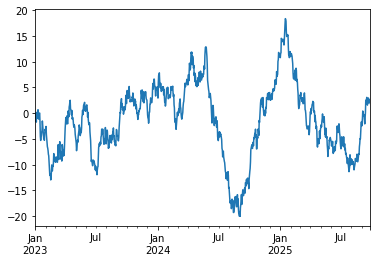

In [201]:
ts.plot()

If running under Jupyter Notebook, the plot will appear on [`plot()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.html#pandas.Series.plot). Otherwise use [`matplotlib.pyplot.show`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.show.html) to show it or [`matplotlib.pyplot.savefig`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.savefig.html) to write it to a file.

On a DataFrame, the [`plot()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot) method is a convenience to plot all of the columns with labels:

In [206]:
df = pd.DataFrame(
    np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
)

df

,A,B,C,D
2023-01-01,0.893910,1.557533,1.391411,-1.818304
2023-01-02,0.430021,-0.045819,-1.160083,-0.573786
2023-01-03,0.348308,-0.530725,-1.208756,-2.074414
2023-01-04,0.612972,-1.546190,0.801861,0.555108
2023-01-05,0.936486,0.876662,-0.474661,-0.393873
...,...,...,...,...
2025-09-22,-0.057009,-1.072625,0.511854,-1.157264
2025-09-23,-0.428150,-0.441458,-0.032855,0.528877
2025-09-24,0.006262,-0.114026,-0.867111,0.153402
2025-09-25,0.860467,1.651096,1.768416,1.003758


In [207]:
df = df.cumsum()
df

,A,B,C,D
2023-01-01,0.893910,1.557533,1.391411,-1.818304
2023-01-02,1.323931,1.511714,0.231328,-2.392090
2023-01-03,1.672239,0.980989,-0.977428,-4.466504
2023-01-04,2.285211,-0.565201,-0.175567,-3.911396
2023-01-05,3.221697,0.311461,-0.650228,-4.305269
...,...,...,...,...
2025-09-22,-54.903141,-23.746732,7.048748,8.798066
2025-09-23,-55.331291,-24.188190,7.015893,9.326942
2025-09-24,-55.325029,-24.302216,6.148783,9.480344
2025-09-25,-54.464562,-22.651120,7.917199,10.484102


<Figure size 432x288 with 0 Axes>

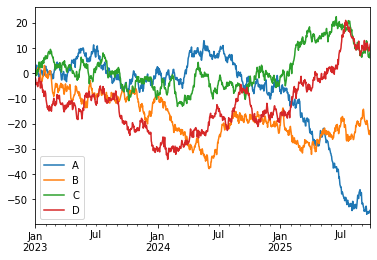

In [208]:
plt.figure();
df.plot();
plt.legend(loc='best');

## Importing and exporting data

### CSV

[Writing to a csv file](https://pandas.pydata.org/docs/user_guide/io.html#io-store-in-csv): using [`DataFrame.to_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html#pandas.DataFrame.to_csv)

In [209]:
df.to_csv("foo.csv")

[Reading from a csv file](https://pandas.pydata.org/docs/user_guide/io.html#io-read-csv-table): using [`read_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html#pandas.read_csv)

In [210]:
pd.read_csv("foo.csv")

,Unnamed: 0,A,B,C,D
0,2023-01-01,0.893910,1.557533,1.391411,-1.818304
1,2023-01-02,1.323931,1.511714,0.231328,-2.392090
2,2023-01-03,1.672239,0.980989,-0.977428,-4.466504
3,2023-01-04,2.285211,-0.565201,-0.175567,-3.911396
4,2023-01-05,3.221697,0.311461,-0.650228,-4.305269
...,...,...,...,...,...
995,2025-09-22,-54.903141,-23.746732,7.048748,8.798066
996,2025-09-23,-55.331291,-24.188190,7.015893,9.326942
997,2025-09-24,-55.325029,-24.302216,6.148783,9.480344
998,2025-09-25,-54.464562,-22.651120,7.917199,10.484102


### Excel

Reading and writing to [Excel](https://pandas.pydata.org/docs/user_guide/io.html#io-excel).

Writing to an excel file using [`DataFrame.to_excel()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_excel.html#pandas.DataFrame.to_excel):

In [211]:
df.to_excel("foo.xlsx", sheet_name="Sheet1")

Reading from an excel file using [`read_excel()`](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html#pandas.read_excel):

In [212]:
pd.read_excel("foo.xlsx", "Sheet1", index_col=None, na_values=["NA"])

,Unnamed: 0,A,B,C,D
0,2023-01-01,0.893910,1.557533,1.391411,-1.818304
1,2023-01-02,1.323931,1.511714,0.231328,-2.392090
2,2023-01-03,1.672239,0.980989,-0.977428,-4.466504
3,2023-01-04,2.285211,-0.565201,-0.175567,-3.911396
4,2023-01-05,3.221697,0.311461,-0.650228,-4.305269
...,...,...,...,...,...
995,2025-09-22,-54.903141,-23.746732,7.048748,8.798066
996,2025-09-23,-55.331291,-24.188190,7.015893,9.326942
997,2025-09-24,-55.325029,-24.302216,6.148783,9.480344
998,2025-09-25,-54.464562,-22.651120,7.917199,10.484102
